In [3]:
import ib_naming_model
import numpy as np
from tools import *

model = ib_naming_model.load_model()

2021-10-17 12:00:54,964 [INFO] [ib_naming_model - load_model] loading model from file: ./models/IB_color_naming_model/model.pkl


In [16]:
import pandas as pd

__CHIPS = pd.read_csv("./data/cnum-vhcm-lab-new.txt", delimiter="\t").sort_values(by="#cnum")
WCS_CNUMS = pd.read_csv("./data/chip.txt", delimiter="\t", header=None).values
WCS_CHIPS = __CHIPS[["L*", "a*", "b*"]].values

In [18]:
WCS_CHIPS.shape

(330, 3)

In [43]:
pW_M_fake = np.random.rand(330, 10)
pW_M_fake /= pW_M_fake.sum(axis=1)[:, None]
print(model.fit(pW_M_fake)[:-1])

(0.22251429039020842, 0.9476107808452052, 1.0076345431789737)


4.084800772882539 3.660347836329043


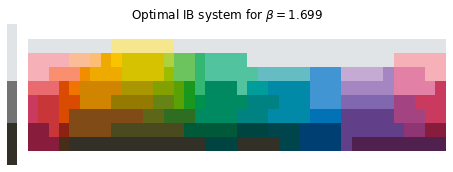

In [60]:
import matplotlib.pyplot as plt

indx = 1000
qW_M = model.qW_M[indx]
plt.figure(figsize=(6.4, 2.5))
model.mode_map(qW_M)
plt.title("Optimal IB system for $\\beta = %.3f$" % model.betas[indx])
plt.tight_layout()
print(model.complexity(qW_M), model.accuracy(qW_M))


In [68]:
# model[0]

(0.0, 4.471200132814856)

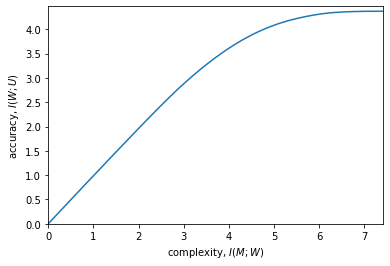

In [66]:
complexity, accuracy = model.IB_curve
plt.figure()
plt.plot(complexity, accuracy)
plt.xlabel("complexity, $I(M;W)$")
plt.ylabel("accuracy, $I(W;U)$")
plt.xlim([0, H(model.pM)])
plt.ylim([0, model.I_MU + 0.1])